In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp


In [3]:
data = pd.read_csv("master.csv").drop(['HDI for year','country-year'],axis=1)
data['all_population'] = data.groupby(['country','year'])['population'].transform(sum)
data['all_population'] = np.where(data.year > 2016, data.population, data.all_population)
data.rename(columns={'sex':'gender',' gdp_for_year ($) ':'GdpForYear','gdp_per_capita ($)':'GdpPerCapita'},inplace=True)
country_to_id = {}

for country in data['country'].unique():
    if country not in country_to_id:
        country_to_id[country] = len(country_to_id) + 1

data['country_id'] = data['country'].map(country_to_id)
data.loc[data.country_id == 1].country.unique()

array(['Albania'], dtype=object)

In [4]:
data =data.dropna(subset=['suicides_no'])
data.loc[(data.country == "Denmark") & (data.year == 2014
                                        )]
data.head()

,country,year,gender,age,suicides_no,population,suicides/100k pop,GdpForYear,GdpPerCapita,generation,all_population,country_id
0,Albania,1987,male,15-24 years,21.0,312900,6.71,"2,15,66,24,900",796.0,Generation X,2709600,1
1,Albania,1987,male,35-54 years,16.0,308000,5.19,"2,15,66,24,900",796.0,Silent,2709600,1
2,Albania,1987,female,15-24 years,14.0,289700,4.83,"2,15,66,24,900",796.0,Generation X,2709600,1
3,Albania,1987,male,75+ years,1.0,21800,4.59,"2,15,66,24,900",796.0,G.I. Generation,2709600,1
4,Albania,1987,male,25-34 years,9.0,274300,3.28,"2,15,66,24,900",796.0,Boomers,2709600,1


In [17]:
data.describe()

,year,suicides_no,population,suicides/100k pop,GdpPerCapita,all_population,country_id
count,30556.000000,30556.000000,3.055600e+04,30556.000000,30556.000000,3.055600e+04,30556.000000
mean,2002.766854,237.136242,4.990492e+06,12.176806,17447.027437,2.345755e+07,51.052559
std,9.408922,867.956107,3.352492e+07,21.883165,19314.352213,5.108312e+07,29.703053
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000,2.519200e+04,1.000000
25%,1995.000000,3.000000,1.198480e+05,0.553214,3672.000000,2.076217e+06,26.000000
50%,2003.000000,25.000000,5.148010e+05,4.790000,9978.000000,5.895508e+06,49.000000
75%,2010.000000,132.000000,2.401046e+06,15.150000,25570.000000,2.129040e+07,76.000000
max,2020.000000,22338.000000,1.396215e+09,515.092734,126352.000000,1.396215e+09,114.000000


,country,year,gender,age,suicides_no,population,suicides/100k pop,GdpForYear,GdpPerCapita,generation,all_population,country_id
20996,Russian Federation,1994,male,35-54 years,22338.0,19044200,117.3,"3,95,07,73,01,248",2853.0,Boomers,138476200,76


In [23]:
data.year = data.year.astype('str')
suicide_rate = data[['year', 'suicides_no']].groupby(['year']).sum().reset_index()
fig = go.Figure(
    data=[go.Line(y=suicide_rate['suicides_no'], x=suicide_rate['year'])],
    layout=go.Layout(
        title='Number of suicides per year',
        yaxis=dict(
            title='Number of Suicides'
        )
    )
)
fig.data[0].name = 'All countries'
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [24]:
sex_suicide = data[['gender', 'suicides_no', 'age']].groupby(['gender', 'age']).sum().reset_index()
sex_suicide

,gender,age,suicides_no
0,female,15-24 years,196790.0
1,female,25-34 years,230225.0
2,female,35-54 years,548422.0
3,female,5-14 years,20111.0
4,female,55-74 years,468293.0
5,female,75+ years,241237.0
6,male,15-24 years,684300.0
7,male,25-34 years,978490.0
8,male,35-54 years,2049269.0
9,male,5-14 years,39727.0


In [25]:
genders = go.Pie(labels=sex_suicide['gender'], values=sex_suicide['suicides_no'])
male = go.Pie(labels=sex_suicide['age'][sex_suicide['gender']=='male'], 
              values=sex_suicide['suicides_no'][sex_suicide['gender']=='male'])
female = go.Pie(labels=sex_suicide['age'][sex_suicide['gender']=='female'], 
              values=sex_suicide['suicides_no'][sex_suicide['gender']=='female'])

fig = go.Figure()

fig.add_trace(genders)
fig.add_trace(male)
fig.add_trace(female)

fig.data[0].visible = True
fig.data[1].visible = False
fig.data[2].visible = False


fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            buttons=[
                dict(
                    label="All",
                    method="update",
                    args=[{"visible": [True, False, False]}]
                ),
                dict(
                    label="Male",
                    method="update",
                    args=[{"visible": [False, True, False]}]
                ),
                dict(
                    label="Female",
                    method="update",
                    args=[{"visible": [False, False, True]}]
                )
            ],
            direction="down",
            pad={"r": 1, "t": 1},
            showactive=True,
            x=0,
            xanchor="left",
            y=1.2,
            yanchor="top"
    )],
    title={
        'text': "Siucide number by gender and age",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_traces(marker_colors=['setosa','virginica'])

fig.show()

In [31]:
mean_vals = data[['country', 'year', 'suicides_no', 'all_population','GdpPerCapita']].groupby(['country', 'year']).agg({'suicides_no': 'sum', 'all_population': 'first','GdpPerCapita': 'first'}).reset_index()
mean_vals['suicides_rate'] = mean_vals['suicides_no'] / (mean_vals['all_population']/100000)
print(mean_vals.loc[mean_vals.suicides_no == mean_vals.suicides_no.max()][['country','suicides_no','year']])
data.loc[data.suicides_no == data.suicides_no.max()][['gender','suicides_no','year','country']]

                 country  suicides_no  year
1928  Russian Federation      61420.0  1994


,gender,suicides_no,year,country
20996,male,22338.0,1994,Russian Federation


In [11]:
data.loc[data.year == 2020].size

3168

In [27]:
choropleth_map = go.Figure()
years = mean_vals['year'].unique()
years.sort()

visible = [False] * len(years)
visible[0] = True

for i, year in enumerate(years):
    trace = go.Choropleth(
        locations=mean_vals.loc[mean_vals['year'] == year].country,
        locationmode='country names',
        colorscale='Portland',
        z=mean_vals.loc[mean_vals['year'] == year].suicides_rate,
        colorbar={'title': 'Suicide number (higher=worse)'},
        marker={
            'line': {
                'color': 'rgb(255,255,255)',
                'width': 2
            }
        },
        visible=visible[i]
    )
    choropleth_map.add_trace(trace)

dropdown_menu = []

for i, year in enumerate(years):
    dropdown_menu.append(
        dict(
            args=[{'visible': [y == year for y in years]}],
            label=str(year),
            method='update'
        )
    )

choropleth_map.update_layout(
    title_text='Number of suicides per 100k for years',
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_menu,
            direction='down',
            showactive=True,
            x=0,
            y=1
        )
    ],
    geo={
        'scope': 'world'
    }
)
choropleth_map.show()

In [28]:
gdp_to_suicide = data[['country','year', 'suicides_no','GdpPerCapita']].groupby(['country','year']).agg({'suicides_no': 'sum', 'GdpPerCapita': 'first'}).reset_index()
gdp_to_suicide = gdp_to_suicide[['year','suicides_no','GdpPerCapita']].groupby('year').agg({'suicides_no': 'sum', 'GdpPerCapita': 'mean'}).reset_index()
gdp_to_suicide

,year,suicides_no,GdpPerCapita
0,1985,116063.0,6091.229167
1,1986,120670.0,7126.104167
2,1987,126842.0,8712.592593
3,1988,121026.0,9983.857143
4,1989,160244.0,9725.038462
5,1990,193361.0,9806.328125
6,1991,198020.0,10132.937500
7,1992,211473.0,10506.707692
8,1993,221565.0,10553.584615
9,1994,232063.0,11567.102941


In [29]:
fig = go.Figure(
    data=[go.Line(y=gdp_to_suicide.GdpPerCapita, x=gdp_to_suicide.year)],
    layout_title_text="World GdpPerCapita"
)
fig.show()
fig = go.Figure(
    data=[go.Line(y=gdp_to_suicide.suicides_no, x=gdp_to_suicide.year)],
    layout_title_text="Number of suicides per year"
)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




<ipython-input-30-9c92a8450a5b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



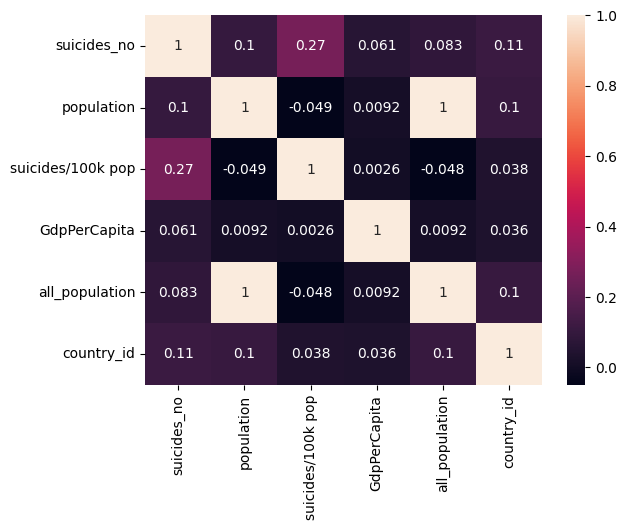

In [30]:

cor = sns.heatmap(data.corr(), annot = True)

In [31]:
country_rate = data.loc[data['country'] == "Slovakia"][['year','suicides_no']].groupby(['year']).sum().reset_index()
fig = go.Figure(
    data=[go.Bar(y=country_rate['suicides_no'], x=country_rate['year'])],
    layout=go.Layout(
        title='Number of suicides per year in Slovakia',
        yaxis=dict(
            title='Number of Suicides'
        )
    )
)
fig.data[0].name = 'Slovakia'
fig.show()

In [32]:
sex_country_suicide = data.loc[data['country'] == "Slovakia"][['gender', 'suicides_no', 'age']].groupby(['gender', 'age']).sum().reset_index()
genders = go.Pie(labels=sex_country_suicide['gender'], values=sex_country_suicide['suicides_no'])
male = go.Pie(labels=sex_country_suicide['age'][sex_country_suicide['gender']=='male'], 
              values=sex_country_suicide['suicides_no'][sex_country_suicide['gender']=='male'])
female = go.Pie(labels=sex_country_suicide['age'][sex_country_suicide['gender']=='female'], 
              values=sex_country_suicide['suicides_no'][sex_country_suicide['gender']=='female'])

fig = go.Figure()

fig.add_trace(genders)
fig.add_trace(male)
fig.add_trace(female)

fig.data[0].visible = True
fig.data[1].visible = False
fig.data[2].visible = False


fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            buttons=[
                dict(
                    label="All",
                    method="update",
                    args=[{"visible": [True, False, False]}]
                ),
                dict(
                    label="Male",
                    method="update",
                    args=[{"visible": [False, True, False]}]
                ),
                dict(
                    label="Female",
                    method="update",
                    args=[{"visible": [False, False, True]}]
                )
            ],
            direction="down",
            pad={"r": 1, "t": 1},
            showactive=True,
            x=0,
            xanchor="left",
            y=1.2,
            yanchor="top"
    )],
    title={
        'text': "Siucide number by gender and age in Slovakia",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_traces(marker_colors=['setosa','virginica'])

fig.show()

In [33]:
mean_vals.loc[mean_vals['country'] == "Albania"]

,country,year,suicides_no,all_population,GdpPerCapita,suicides_rate
0,Albania,1987,73.0,2709600,796.0,2.694125
1,Albania,1988,63.0,2764300,769.0,2.279058
2,Albania,1989,68.0,2803100,833.0,2.425886
3,Albania,1992,47.0,2822500,251.0,1.665190
4,Albania,1993,73.0,2807300,437.0,2.600363
5,Albania,1994,50.0,2849300,697.0,1.754817
6,Albania,1995,88.0,2903400,835.0,3.030929
7,Albania,1996,89.0,2940200,1127.0,3.027005
8,Albania,1997,170.0,2977300,793.0,5.709871
9,Albania,1998,154.0,3012700,899.0,5.111694


In [34]:
def fig4(country):
  dunno = mean_vals.loc[mean_vals['country'] == country]
  fig = sp.make_subplots(specs=[[{"secondary_y": True}]])

      # Add traces
  fig.add_trace(
      go.Scatter(x=dunno['year'], y=dunno['GdpPerCapita'], # replace with your own data source
      name="GdpPerCapita"), secondary_y=False,
  )

  fig.add_trace(
      go.Scatter(x=dunno['year'], y=dunno['suicides_rate'], name="Suicide rate"),
      secondary_y=True,
  )

  # Add figure title
  fig.update_layout(title_text="Suicides rate comapred to GdpPerCapita")

  # Set x-axis title
  fig.update_xaxes(title_text="year")

  # Set y-axes titles
  fig.update_yaxes(
      title_text="<b>primary</b> Suicide_rate/100k", 
      secondary_y=False)
  fig.update_yaxes(
      title_text="<b>secondary</b> GdpPerCapita", 
      secondary_y=True)
  fig.show()
fig4("Albania")

In [60]:
temp_data = data.loc[(data.country == "United States")][['suicides_no','year','GdpPerCapita','gender']].groupby(['year','gender']).agg({'suicides_no':'sum','GdpPerCapita':'first'}).reset_index()
temp_data
fig = px.scatter(temp_data, x="GdpPerCapita", y="suicides_no", color="gender", trendline="ols")
fig.show()